In [1]:
# importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_1samp
%matplotlib inline
sns.set_style('whitegrid')
sns.set_color_codes()

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
# checking the data
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# checking inforamtion about variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# description about numberical variables 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# droping the passengerId from dataset 
df.drop('PassengerId', axis=1, inplace=True)

In [7]:
# checking missing values present in the data set
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
# dealing with missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Cabin'].fillna(df['Cabin'].mode()[1], inplace=True)
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [10]:
## checking information again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Name        889 non-null object
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Ticket      889 non-null object
Fare        889 non-null float64
Cabin       889 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.3+ KB


In [11]:
df.dtypes.value_counts()

object     5
int64      4
float64    2
dtype: int64

# checking outliers if present in data

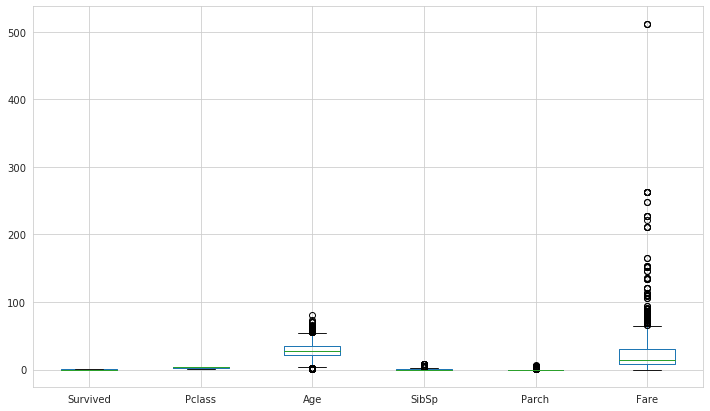

In [12]:
df.plot(kind='box', figsize=(12,7));

## Since, we haven't normalized our data set that is why every variable affected by the units.
## We can clearly see that outliers are present in Age, SibSp, Parch and Fare variables.

In [13]:
def calculate_upper_and_lower_values(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    ll = Q1 - 1.5*IQR
    up = Q3 + 1.5*IQR
    return ll, up

In [14]:
columns = ['Age', 'Fare', 'SibSp']
for i in columns:
    ll, up = calculate_upper_and_lower_values(df[i])
    df[i] = np.where(df[i] > up, int(up), df[i])
    df[i] = np.where(df[i] < ll, ll, df[i])

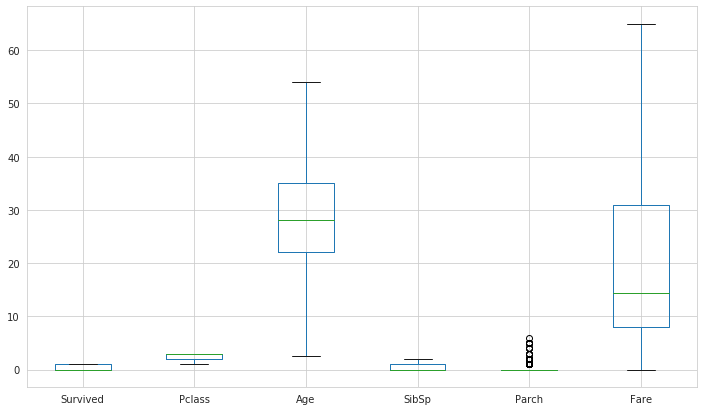

In [15]:
df.plot(kind='box', figsize=(12,7));

## We have successfully remove outliers from our dataset

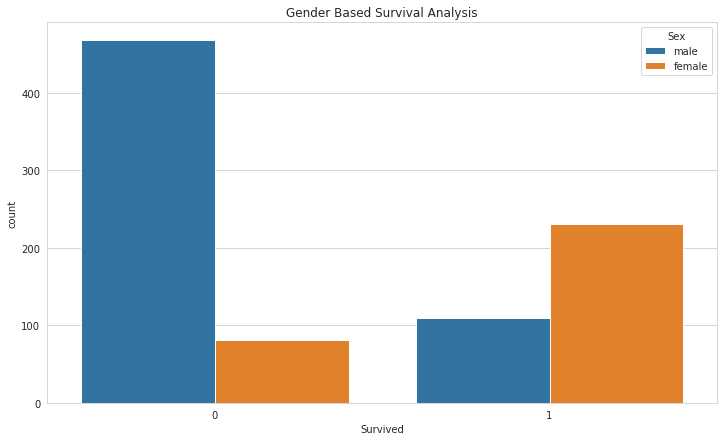

In [16]:
plt.figure(figsize=(12,7));
sns.countplot(df['Survived'], hue=df['Sex']);
plt.title('Gender Based Survival Analysis');

In [17]:
survived_count = df[['Survived','Sex']].groupby('Sex').sum().reset_index().sort_values(by='Survived',ascending=False)
print("Total number of females that survives the crash: {}".format(survived_count.head(1)['Survived'][0]))
print("Total number of males that survives the crash: {}".format(survived_count.tail(1)['Survived'][1]))

Total number of females that survives the crash: 231
Total number of males that survives the crash: 109


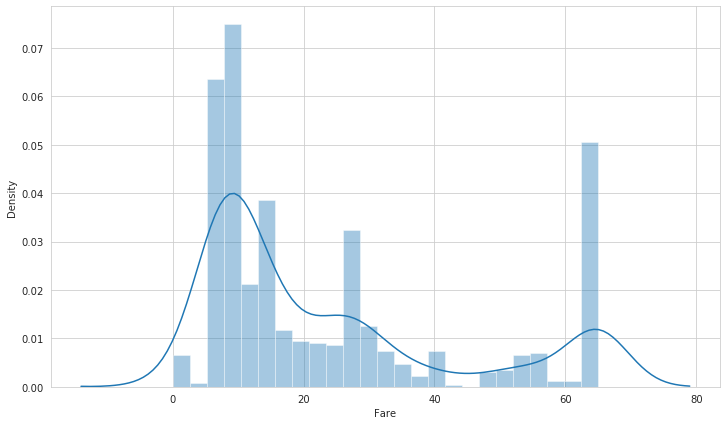

In [18]:
plt.figure(figsize=(12,7));
sns.distplot(df['Fare'], bins=25);
plt.ylabel('Density');

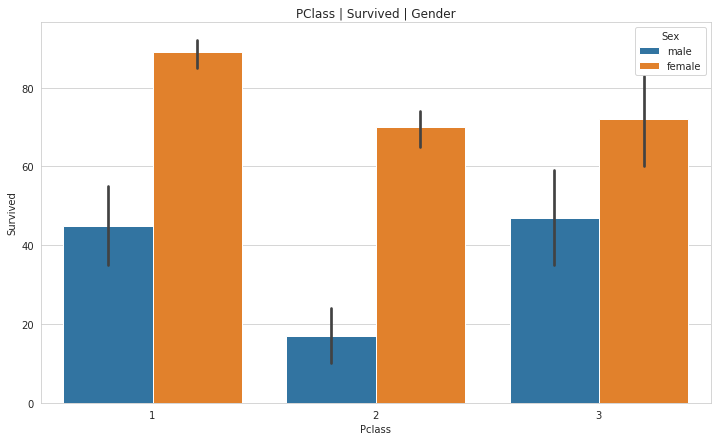

In [19]:
plt.figure(figsize=(12,7));
sns.barplot(df['Pclass'], df['Survived'], hue=df['Sex'], orient='v', estimator=sum);
plt.title('PClass | Survived | Gender');

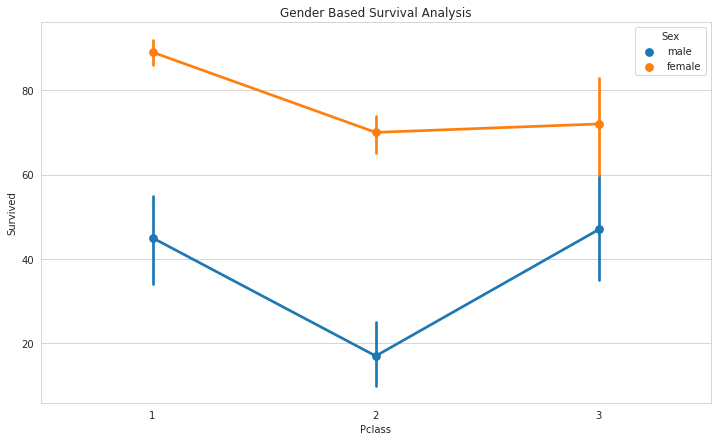

In [20]:
plt.figure(figsize=(12,7));
sns.pointplot(df['Pclass'], df['Survived'], hue=df['Sex'], orient='v', estimator=sum);
plt.title('Gender Based Survival Analysis');

## Here, we conclude that passengers travelling in PClass 1 has survived more in the crash, also less number of male survived the crash who were travelling in PClass 2.

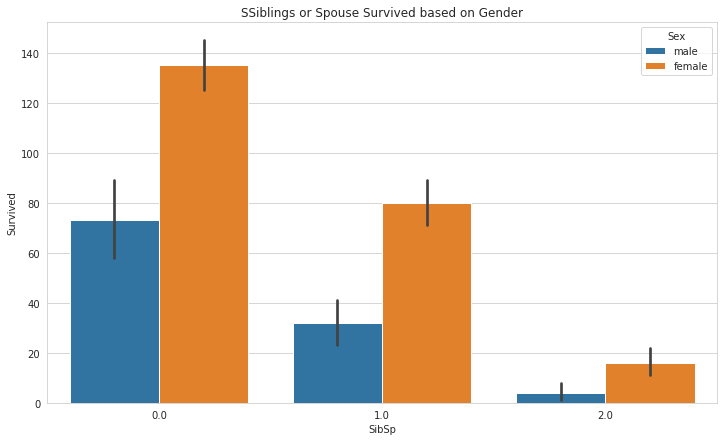

In [21]:
plt.figure(figsize=(12,7));
sns.barplot(df['SibSp'], df['Survived'], hue=df['Sex'], orient='v', estimator=sum);
plt.title('SSiblings or Spouse Survived based on Gender');

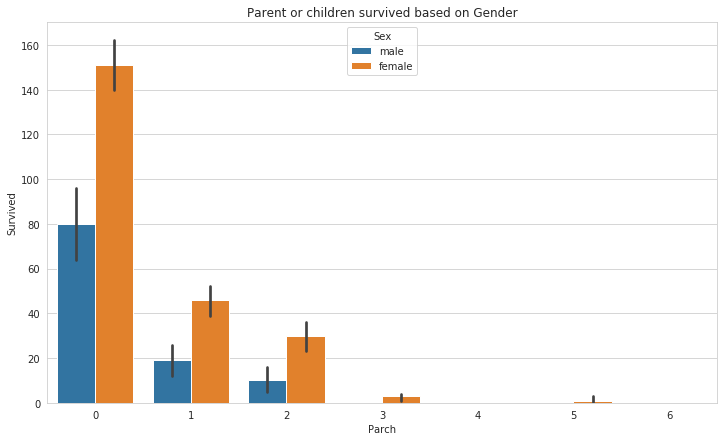

In [22]:
plt.figure(figsize=(12,7));
sns.barplot(df['Parch'], df['Survived'], hue=df['Sex'], orient='v', estimator=sum);
plt.title('Parent or children survived based on Gender');

In [23]:
# creating dummy variables or one hot encoding
sex = pd.get_dummies(df['Sex'], prefix='sex', drop_first=True)
embarked = pd.get_dummies(df['Embarked'], prefix='embarked', drop_first=True)

# concatenate in the main dataset
df = pd.concat([df, sex, embarked], axis=1)

# droping the worthless columns | variables
df.drop(['Name', 'Ticket', 'Cabin', 'Sex', 'Embarked'], axis=1, inplace=True)

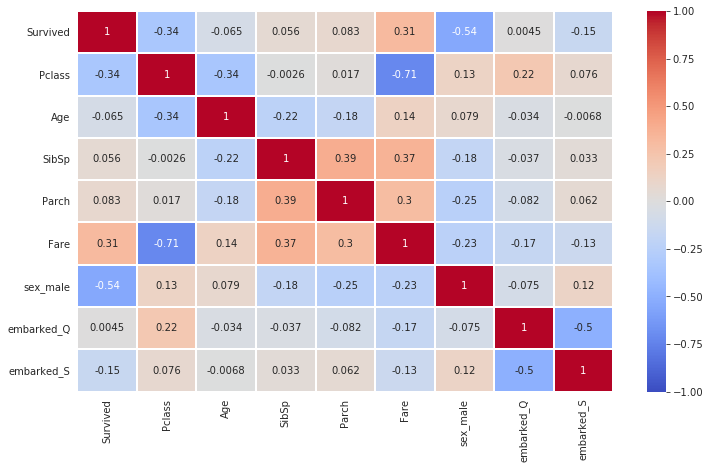

In [24]:
# plotting correlation between variables
plt.figure(figsize=(12,7));
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', lw=1);

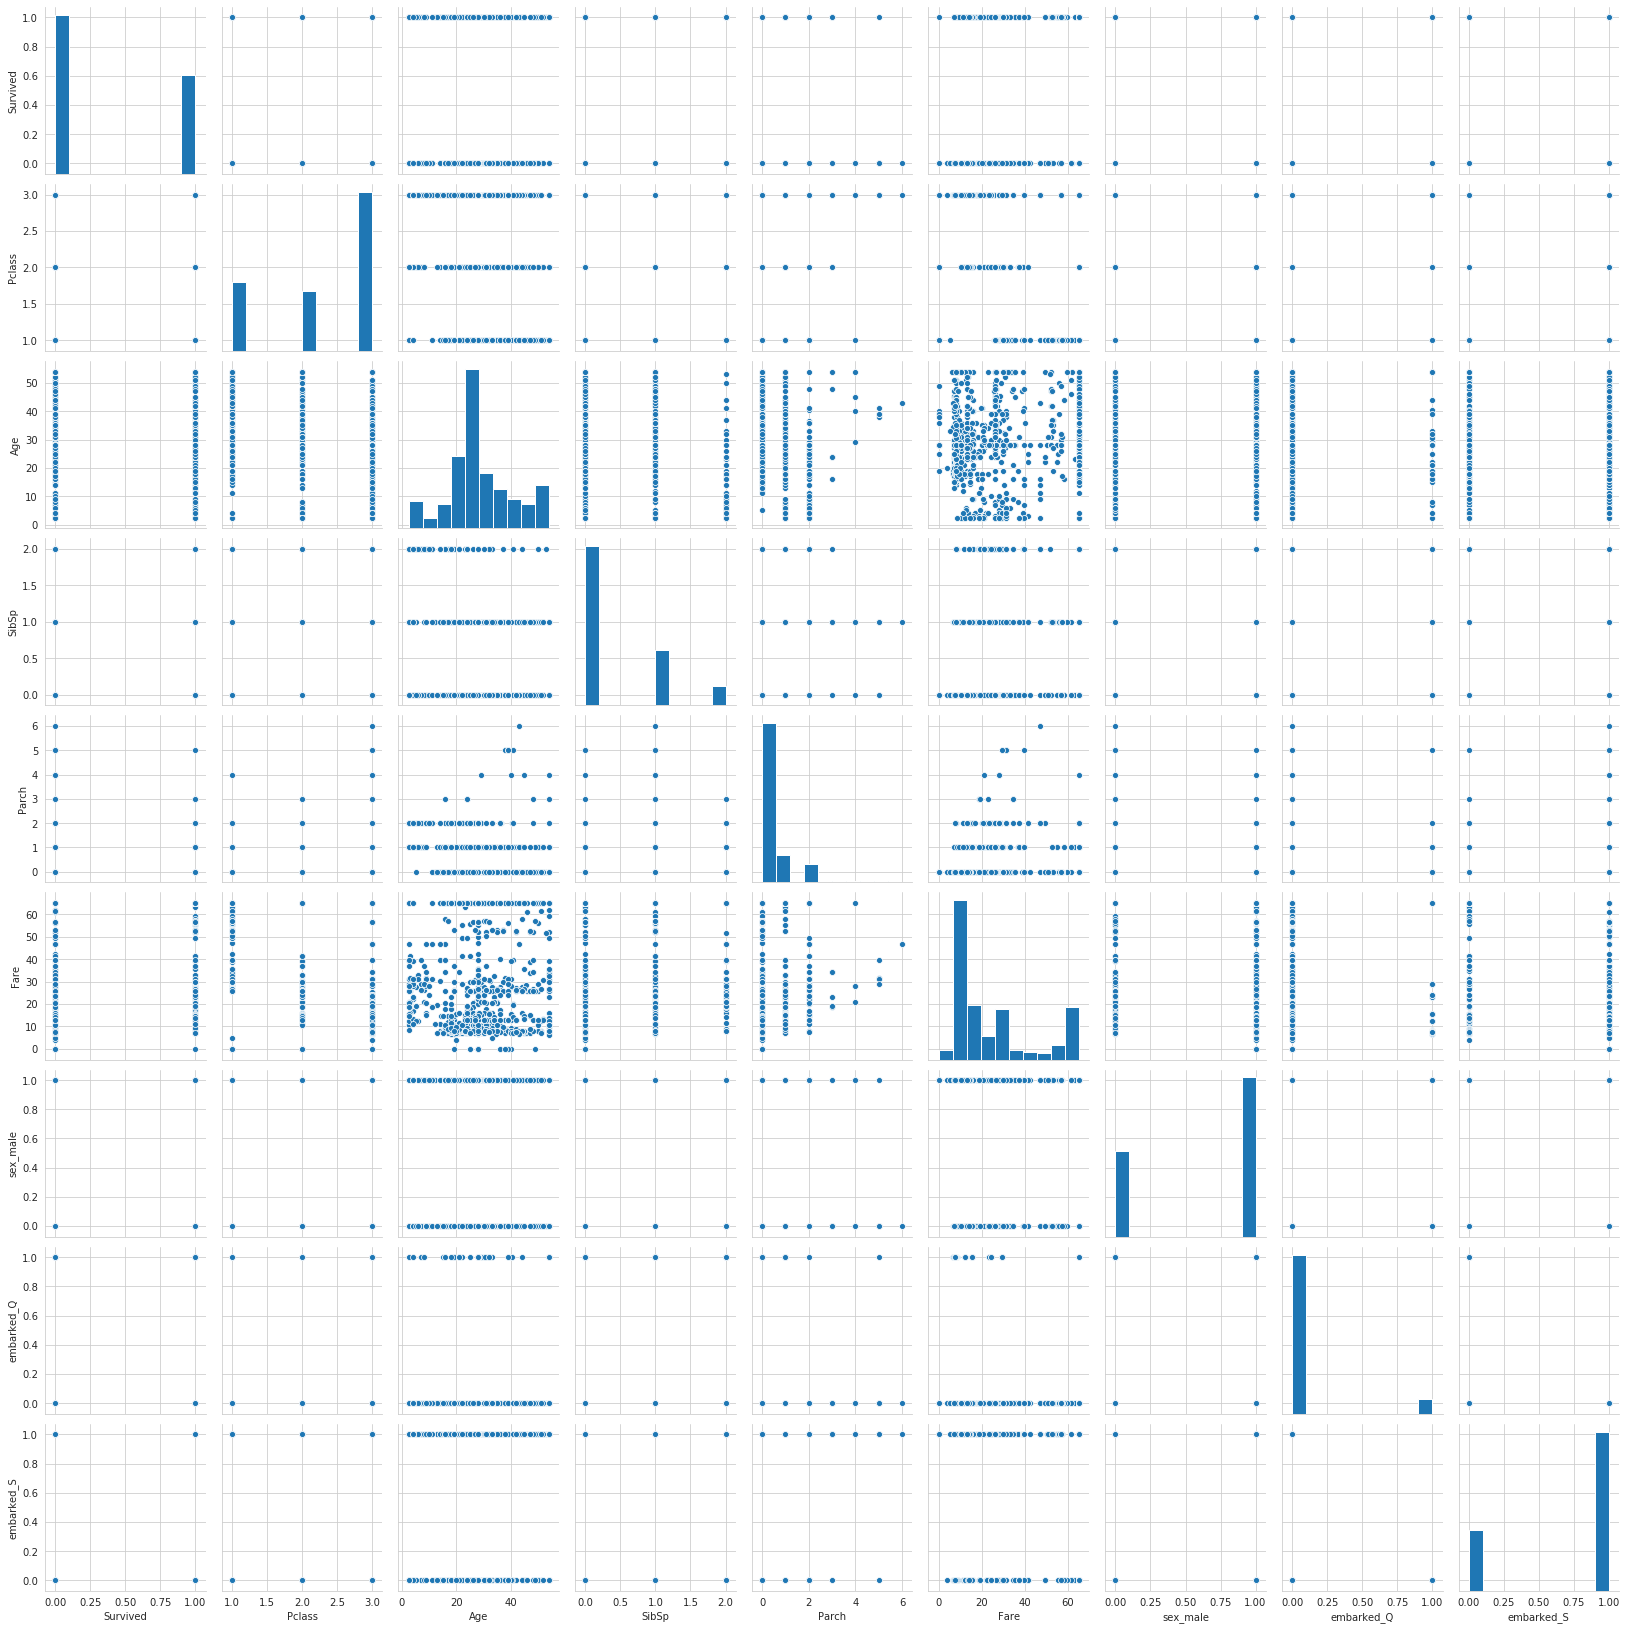

In [25]:
sns.pairplot(df)

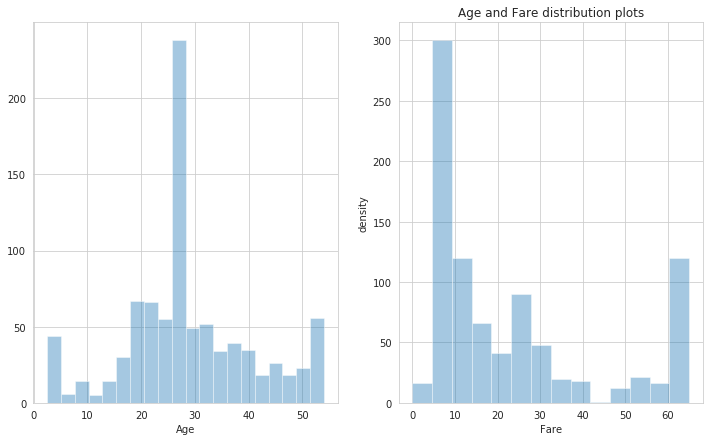

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12,7))
plt.title('Age and Fare distribution plots');
plt.ylabel('density');
sns.distplot(df['Age'], ax=axs[0], kde=False);
sns.distplot(df['Fare'], ax=axs[1], kde=False);

## we can clearly see that Fare is right skewed and Age is looking little right skewed.

In [27]:
age = df['Age'].skew().round(2)
fare = df['Fare'].skew().round(2)
print('Skewness in Age: {}'.format(age))
print('Skewness in Fare: %d'%(fare))

Skewness in Age: 0.15
Skewness in Fare: 1


In [28]:
## checking normality of both the distibutions. We will check it by using Shapiro test and DAgostino K^2 Test
def checking_normality(data, col):
    statistics, p_value = stats.shapiro(data[col])
    if p_value < 0.05 :
        checking_normality_with_k2_test(data, col)
    else:
        print('{} variable is normally distributed'.format(col))

In [29]:
def checking_normality_with_k2_test(data, col):
    statistics, p_value = stats.normaltest(data[col])
    if p_value < 0.05 :
        print("{} variable is not normally distributed".format(col))
    else:
        print("{} variable is normally distributed".format(col))

In [30]:
columns = ['Age', 'Fare']
for i in columns:
    checking_normality(df, i)

Age variable is normally distributed
Fare variable is not normally distributed


In [31]:
## since out plot says that age and fare is normally distributed but Shapiro test is saying that both 
## variables are not normally distributed therefor we will now perform D'Agostino test

## Hence, Age is normally distributed but Fare is not normally distributed tested with Shapiro as well as D'Agostino tests.

In [32]:
# removing multicolinearity as there is strong positive correlation present between Fare and Pclass
df_new = df.drop('Pclass', axis=1)

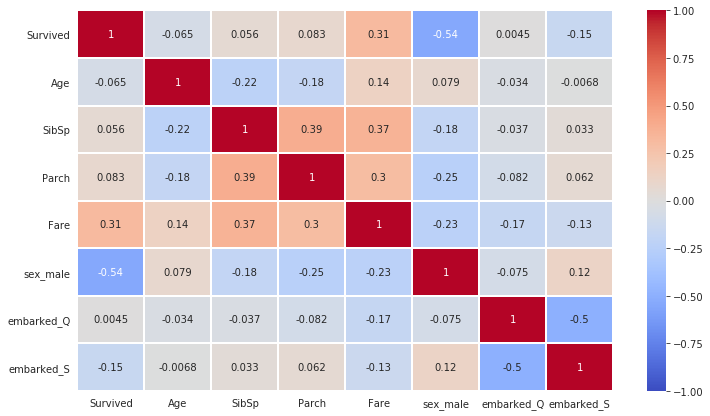

In [33]:
plt.figure(figsize=(12,7));
sns.heatmap(df_new.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', lw=1);

## checking Hypothesis testing for Fare variable that is average population mean Fare for passengers is 25.
## We have to prove that whether the average fare for a passenger travel in Titatnic is equals to 25 or not.

In [34]:
# Ho: mu(Fare) = 25
# H1: mu(Fare) != 25
t_statistics, p_value = ttest_1samp(df['Fare'], 25)
if p_value < 0.05:
    print('Null hypothesis will reject which states that passengers travel in Titanic has average fare not equal to $25.')
else:
    print("We don't have proper evidence to reject null hypothesis which states that passengers travel in Titanic has average fare equals to $25.")

We don't have proper evidence to reject null hypothesis which states that passengers travel in Titanic has average fare equals to $25.
